In [1]:
# Loading packages

import requests
from bs4 import BeautifulSoup
import os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
# Load df from disk
df2=pd.read_csv("df2.csv")
df_ia = pd.read_csv("df_ia.csv")
df_sotu = pd.read_csv("df_sotu.csv")
df_rep = pd.read_csv("df_rep.csv")
df_year = pd.read_csv("df_year.csv")
df_year_demo = pd.read_csv("df_year_demo.csv")
df_year_rep = pd.read_csv("df_year_rep.csv")
df_year_sotu = pd.read_csv("df_year_sotu.csv")
df_year_ia = pd.read_csv("df_year_ia.csv")



[Text(0, 0, '-20,000'),
 Text(0, 0, '0'),
 Text(0, 0, '20,000'),
 Text(0, 0, '40,000'),
 Text(0, 0, '60,000'),
 Text(0, 0, '80,000'),
 Text(0, 0, '100,000'),
 Text(0, 0, '120,000'),
 Text(0, 0, '140,000'),
 Text(0, 0, '160,000'),
 Text(0, 0, '180,000')]

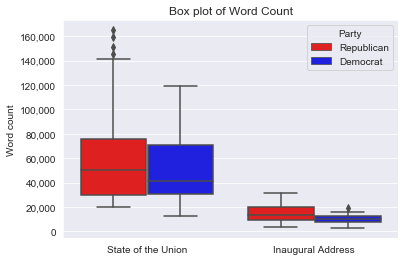

In [3]:
#Boxplot
sns.set_style("darkgrid")
ax = sns.boxplot(x='Type', y="word_count", orient='v', hue='Party', data=df2, palette = ['red', 'blue'])
plt.title("Box plot of Word Count")
plt.xlabel("")
plt.ylabel("Word count")

ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

[Text(0, 0, '-10,000'),
 Text(0, 0, '0'),
 Text(0, 0, '10,000'),
 Text(0, 0, '20,000'),
 Text(0, 0, '30,000'),
 Text(0, 0, '40,000'),
 Text(0, 0, '50,000'),
 Text(0, 0, '60,000'),
 Text(0, 0, '70,000'),
 Text(0, 0, '80,000'),
 Text(0, 0, '90,000')]

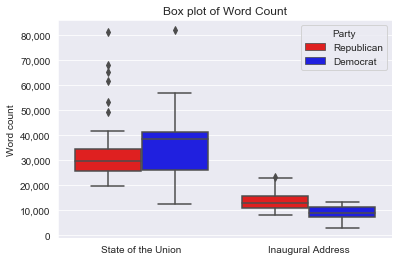

In [4]:
#Boxplot
sns.set_style("darkgrid")
ax = sns.boxplot(x='Type', y="word_count", orient='v', hue='Party', data=df_year, palette = ['red', 'blue'])
plt.title("Box plot of Word Count")
plt.xlabel("")
plt.ylabel("Word count")

ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

In [5]:
# state of the union dataset
df_speech_des = df2.groupby('Type').describe().head()

df_speech_des['word_count'].head()

#df_speech_des['word_count']
#with open('mytable.tex','w') as tf:
 #   tf.write(df_speech_des[XXX].to_latex())

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Inaugural Address,39.0,12939.717949,6359.463056,2935.0,8184.0,12064.0,15420.5,31325.0
State of the Union,133.0,56252.210526,33248.021173,12552.0,30803.0,45081.0,72689.0,164834.0


In [6]:
# state of the union dataset
df_speech_des = df_year.groupby('Type').describe().head()

df_speech_des['word_count'].head()

#df_speech_des['word_count']
#with open('mytable.tex','w') as tf:
 #   tf.write(df_speech_des[XXX].to_latex())

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Inaugural Address,24.0,11598.125000,4830.803834,2935.0,8185.50,11041.5,13368.0,23230.0
State of the Union,70.0,34921.128571,13857.545356,12552.0,25752.75,30976.0,40895.0,81808.0


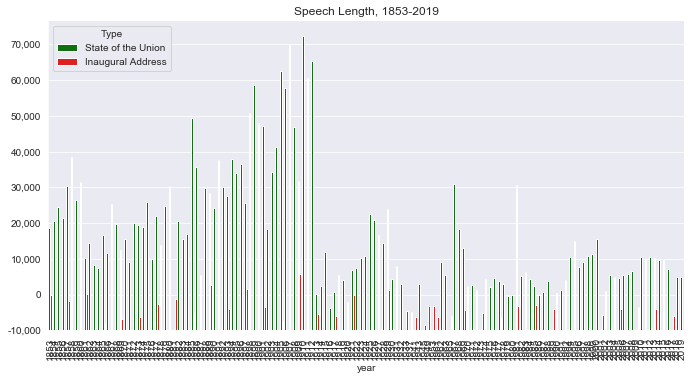

In [7]:
sns.set_style("darkgrid")

timeline = sns.catplot(x="year",y="word_count",hue="Type",data=df2,kind="bar",height=5,aspect=2,legend_out=False, palette=['green','red'])
timeline.set_xticklabels(rotation=90)
plt.title("Speech Length, 1853-2019")
plt.ylabel("")
timeline.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

#plt.figure(figsize=(20,70))

TypeError: 'str' object is not callable

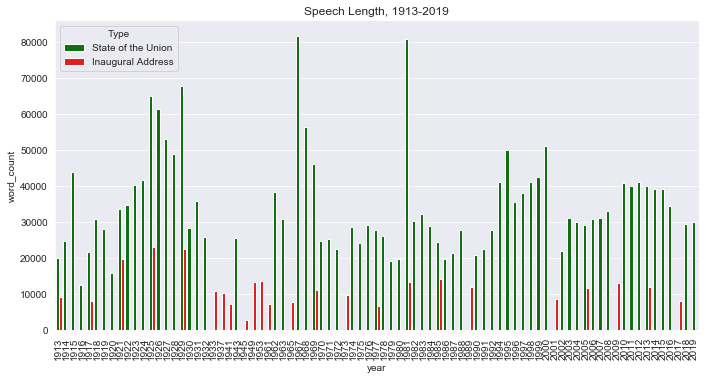

In [23]:
sns.set_style("darkgrid")

timeline = sns.catplot(x="year",y="word_count",hue="Type",data=df_year,kind="bar",height=5,aspect=2,legend_out=False, palette=['green','red'])
timeline.set_xticklabels(rotation=90)
plt.title("Speech Length, 1913-2019")
plt.ylabel("")
timeline.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

#plt.figure(figsize=(20,70))

In [22]:
df_year.tail()

,Name,Type,Party,Republican,year,Speech_Parsed_2,Speech_words,mean_word_length,word_count,some_word_count,...,words,sentences,mean_sentence_length,positive_words,negative_words,positive_words_ratio,negative_words_ratio,we_count,war_count,i_count
89,Woodrow Wilson,State of the Union,Democrat,0,1916,gentlemen of the congress: in fulfilling at th...,"['', '', '', '', '', 'fulfil', '', '', 'time',...",6.273551,12552,9082,...,"['gentlemen', 'of', 'the', 'congress', ':', 'i...",['gentlemen of the congress: in fulfilling at ...,123.212358,61,44,0.006717,0.004845,8,1,17
90,Woodrow Wilson,State of the Union,Democrat,0,1915,gentlemen of the congress: since i last had th...,"['', '', '', '', 'since', '', 'last', '', '', ...",6.276813,43980,31603,...,"['gentlemen', 'of', 'the', 'congress', ':', 's...",['gentlemen of the congress: since i last had ...,124.236969,311,162,0.009841,0.005126,113,11,44
91,Woodrow Wilson,State of the Union,Democrat,0,1914,the session upon which you are now entering wi...,"['', 'session', 'upon', '', '', '', '', 'enter...",6.276653,24884,17046,...,"['the', 'session', 'upon', 'which', 'you', 'ar...",['the session upon which you are now entering ...,124.571520,219,84,0.012848,0.004928,130,4,30
92,Woodrow Wilson,State of the Union,Democrat,0,1913,gentlemen of the congress:in pursuance of my c...,"['', '', '', 'congressin', 'pursuance', '', ''...",6.278777,20186,14116,...,"['gentlemen', 'of', 'the', 'congress', ':', 'i...",['gentlemen of the congress:in pursuance of my...,125.007499,144,87,0.010201,0.006163,39,0,35
93,Woodrow Wilson,Inaugural Address,Democrat,0,1913,there has been a change of government. it bega...,"['', '', '', '', 'change', '', 'government', '...",6.279631,9270,6798,...,"['there', 'has', 'been', 'a', 'change', 'of', ...","['there has been a change of government.', 'it...",125.087042,77,66,0.011327,0.009709,37,0,4


AttributeError: 'numpy.ndarray' object has no attribute 'get_yticks'

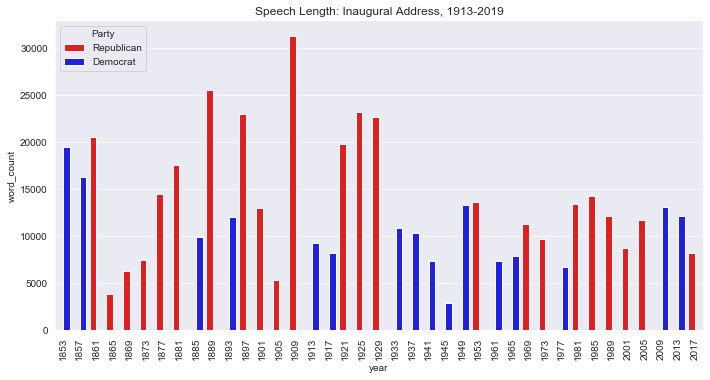

In [24]:
sns.set_style("darkgrid")

timeline = sns.catplot(x="year",y="word_count",hue="Party",data=df_ia,kind="bar",height=5,aspect=2,legend_out=False, palette=['red','blue'])
timeline.set_xticklabels(rotation=90)
plt.title("Speech Length: Inaugural Address, 1913-2019")
#plt.ylabel("")
timeline.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

#plt.figure(figsize=(20,70))

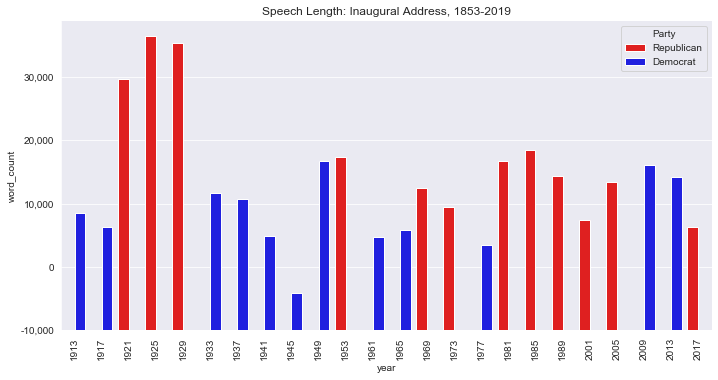

In [10]:
sns.set_style("darkgrid")

timeline = sns.catplot(x="year",y="word_count",hue="Party",data=df_year_ia,kind="bar",height=5,aspect=2,legend_out=False, palette=['red','blue'])
timeline.set_xticklabels(rotation=90)
plt.title("Speech Length: Inaugural Address, 1853-2019")
#plt.ylabel("")
timeline.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

#plt.figure(figsize=(20,70))

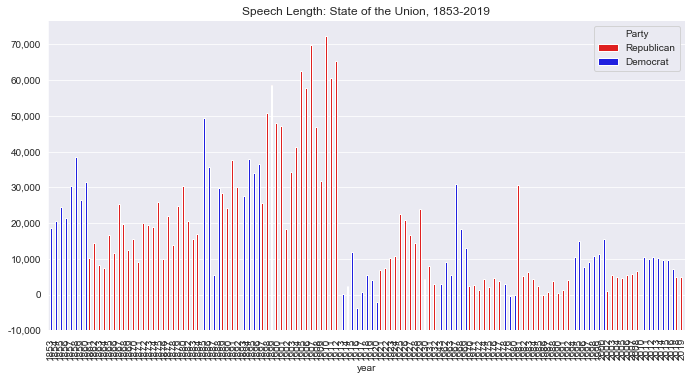

In [11]:
sns.set_style("darkgrid")

timeline = sns.catplot(x="year",y="word_count",hue="Party",data=df_sotu,kind="bar",height=5,aspect=2,legend_out=False, palette=['red','blue'])
timeline.set_xticklabels(rotation=90)
plt.title("Speech Length: State of the Union, 1853-2019")
plt.ylabel("")
timeline.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

#plt.figure(figsize=(20,70))

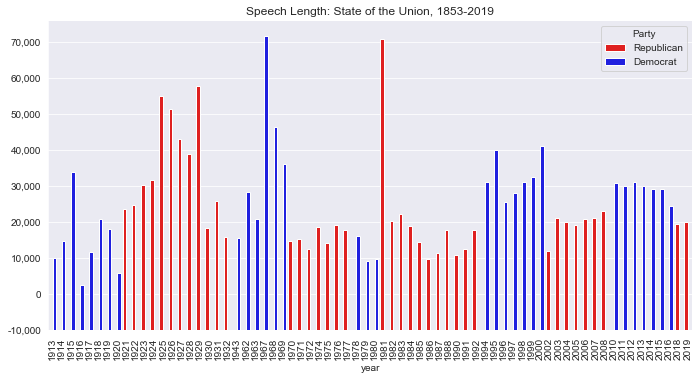

In [12]:
sns.set_style("darkgrid")

timeline = sns.catplot(x="year",y="word_count",hue="Party",data=df_year_sotu,kind="bar",height=5,aspect=2,legend_out=False, palette=['red','blue'])
timeline.set_xticklabels(rotation=90)
plt.title("Speech Length: State of the Union, 1853-2019")
plt.ylabel("")
timeline.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

#plt.figure(figsize=(20,70))

# Positive and Negative 

In [25]:
df2.tail()

,Name,Type,Party,Republican,year,Speech_Parsed_2,Speech_words,mean_word_length,word_count,some_word_count,...,words,sentences,mean_sentence_length,positive_words,negative_words,positive_words_ratio,negative_words_ratio,we_count,war_count,i_count
167,Franklin Pierce,State of the Union,Democrat,0,1856,fellow-citizens of the senate and of the house...,"['', '', '', 'senate', '', '', '', 'house', ''...",6.639776,62821,45523,...,"['fellow-citizens', 'of', 'the', 'senate', 'an...",['fellow-citizens of the senate and of the hou...,188.689278,404,334,0.008875,0.007337,8,8,13
168,Franklin Pierce,State of the Union,Democrat,0,1855,fellow-citizens of the senate and of the house...,"['', '', '', 'senate', '', '', '', 'house', ''...",6.643186,69234,50462,...,"['fellow-citizens', 'of', 'the', 'senate', 'an...",['fellow-citizens of the senate and of the hou...,189.592787,398,352,0.007887,0.006976,6,19,15
169,Franklin Pierce,State of the Union,Democrat,0,1854,fellow-citizens of the senate and of the house...,"['', '', '', 'senate', '', '', '', 'house', ''...",6.645094,60921,44466,...,"['fellow-citizens', 'of', 'the', 'senate', 'an...",['fellow-citizens of the senate and of the hou...,190.051690,418,301,0.009400,0.006769,16,19,41
170,Franklin Pierce,State of the Union,Democrat,0,1853,fellow-citizens of the senate and of the house...,"['', '', '', 'senate', '', '', '', 'house', ''...",6.647093,57019,41353,...,"['fellow-citizens', 'of', 'the', 'senate', 'an...",['fellow-citizens of the senate and of the hou...,190.716199,492,211,0.011898,0.005102,10,9,36
171,Franklin Pierce,Inaugural Address,Democrat,0,1853,my countrymen: it a relief to feel that no hea...,"['', 'countrymen', '', '', 'relief', '', 'feel...",6.649089,19503,14786,...,"['my', 'countrymen', ':', 'it', 'a', 'relief',...",['my countrymen: it a relief to feel that no h...,190.771697,197,91,0.013323,0.006154,12,0,22


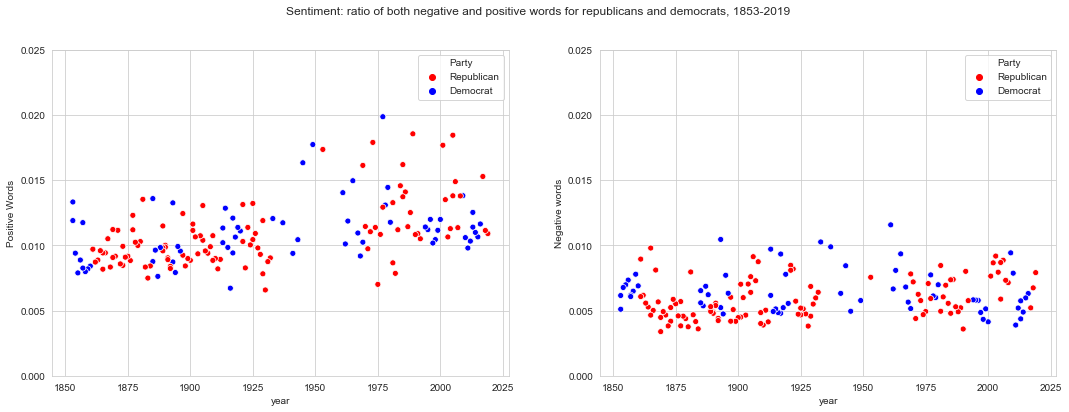

In [13]:
# SOMETHNG IS WRONG WITH THIS GRAPH !! 
# plotting positive and negative words against each other 
import seaborn as sns; sns.set_style("whitegrid")
import matplotlib as mpl

mpl.rcParams['lines.color'] = 'red'

from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(1,2, figsize = (18,6))

sentiment = sns.scatterplot(x="year",y="positive_words_ratio", hue='Party', data=df2, palette = ['red', 'blue'], ax=ax[0])
sentiment2 = sns.scatterplot(x="year",y="negative_words_ratio", hue='Party', data=df2, palette = ['red', 'blue'], ax=ax[1])
plt.suptitle("Sentiment: ratio of both negative and positive words for republicans and democrats, 1853-2019")
ax[0].set_ylabel('Positive Words')
ax[1].set_ylabel('Negative words')

ax[0].set_ylim(0,0.025)
ax[1].set_ylim(0,0.025)

timeline.set_xticklabels(rotation=90)


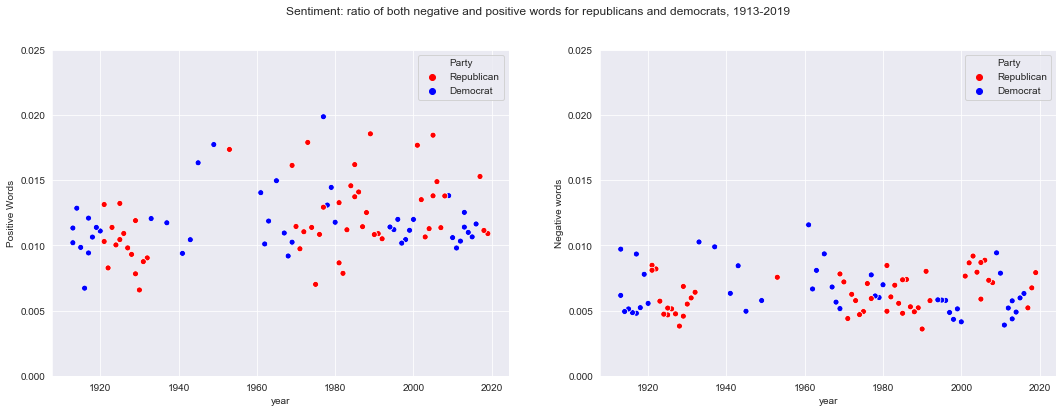

In [26]:
mpl.rcParams['lines.color'] = 'red'

from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(1,2, figsize = (18,6))

sentiment = sns.scatterplot(x="year",y="positive_words_ratio", hue='Party', data=df_year, palette = ['red', 'blue'], ax=ax[0])
sentiment2 = sns.scatterplot(x="year",y="negative_words_ratio", hue='Party', data=df_year, palette = ['red', 'blue'], ax=ax[1])
plt.suptitle("Sentiment: ratio of both negative and positive words for republicans and democrats, 1913-2019")
ax[0].set_ylabel('Positive Words')
ax[1].set_ylabel('Negative words')

ax[0].set_ylim(0,0.025)
ax[1].set_ylim(0,0.025)

timeline.set_xticklabels(rotation=90)

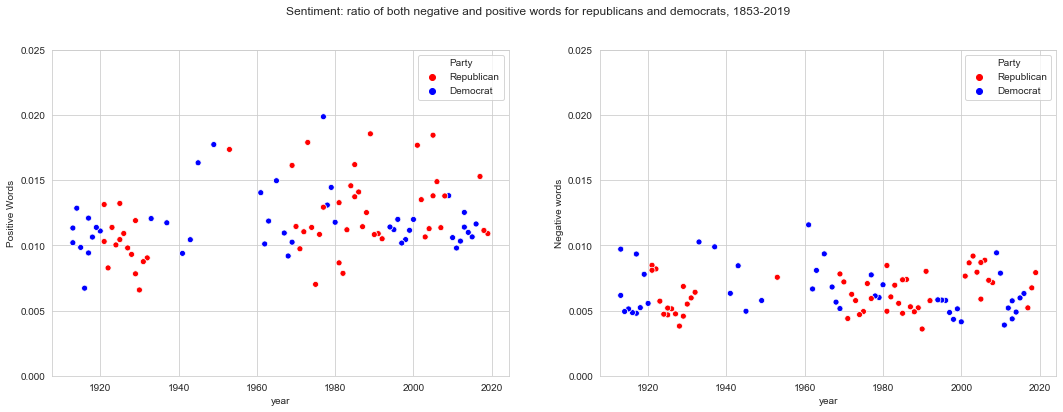

In [14]:
# SOMETHNG IS WRONG WITH THIS GRAPH !! 
# plotting positive and negative words against each other 
import seaborn as sns; sns.set_style("whitegrid")
import matplotlib as mpl

mpl.rcParams['lines.color'] = 'red'

from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(1,2, figsize = (18,6))

sentiment = sns.scatterplot(x="year",y="positive_words_ratio", hue='Party', data=df_year, palette = ['red', 'blue'], ax=ax[0])
sentiment2 = sns.scatterplot(x="year",y="negative_words_ratio", hue='Party', data=df_year, palette = ['red', 'blue'], ax=ax[1])
plt.suptitle("Sentiment: ratio of both negative and positive words for republicans and democrats, 1853-2019")
ax[0].set_ylabel('Positive Words')
ax[1].set_ylabel('Negative words')

ax[0].set_ylim(0,0.025)
ax[1].set_ylim(0,0.025)

timeline.set_xticklabels(rotation=90)


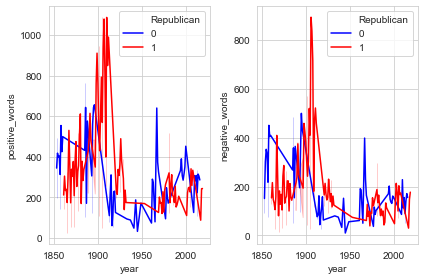

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2)

sentiment= sns.lineplot(x="year",y="positive_words", hue='Republican', data=df2, palette = ['blue', 'red'], ax=axes[0])
sentiment= sns.lineplot(x="year",y="negative_words", hue='Republican', data=df2, palette = ['blue', 'red'], ax=axes[1])
#plt.title("Sentiment: ratio of both negative and positive words for republicans and democrats, 1853-2019")
#plt.ylabel("")

#timeline.set_xticklabels(rotation=90)
#plt.title("Year wise Speech Length")
#plt.ylabel("")
#axes[0].plot(x1, y1)
#axes[1].plot(x2, y2)
fig.tight_layout()

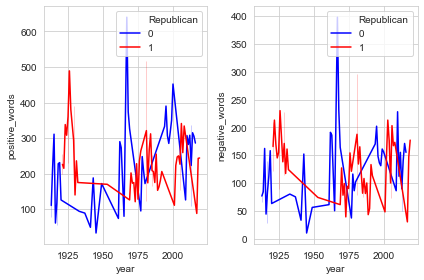

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2)

sentiment= sns.lineplot(x="year",y="positive_words", hue='Republican', data=df_year, palette = ['blue', 'red'], ax=axes[0])
sentiment= sns.lineplot(x="year",y="negative_words", hue='Republican', data=df_year, palette = ['blue', 'red'], ax=axes[1])
#plt.title("Sentiment: ratio of both negative and positive words for republicans and democrats, 1853-2019")
#plt.ylabel("")

#timeline.set_xticklabels(rotation=90)
#plt.title("Year wise Speech Length")
#plt.ylabel("")
#axes[0].plot(x1, y1)
#axes[1].plot(x2, y2)
fig.tight_layout()

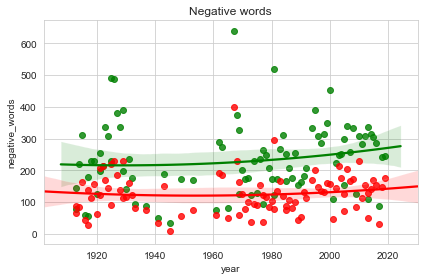

In [17]:
sns.regplot(x=df_year['year'],y=df_year['positive_words'], order=2, color='green').set_title('Positive words')
sns.regplot(x=df_year['year'],y=df_year['negative_words'], order=2, color='red').set_title('Negative words')
plt.tight_layout()
axes[1].set_ylim([0,1])
fig.savefig('plotE.png')

Text(0, 0.5, '')

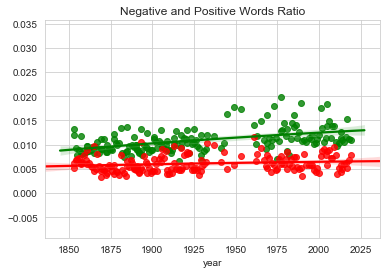

In [18]:
import matplotlib.pyplot as plt

sentiment_m=sns.regplot(x=df2['year'],y=df2['positive_words_ratio'], order=2, color='green').set_title('Positive words')
sentiment_m=sns.regplot(x=df2['year'],y=df2['negative_words_ratio'], order=2, color='red').set_title('Negative and Positive Words Ratio')
#fig.savefig('plotE.png')
plt.title("Negative and Positive Words Ratio")
plt.ylabel("")


Text(0, 0.5, '')

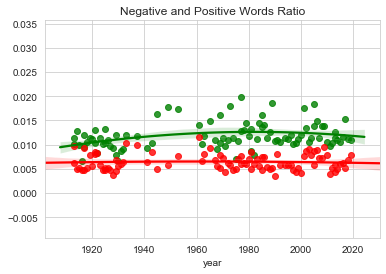

In [19]:
import matplotlib.pyplot as plt

sentiment_m=sns.regplot(x=df_year['year'],y=df_year['positive_words_ratio'], order=2, color='green').set_title('Positive words')
sentiment_m=sns.regplot(x=df_year['year'],y=df_year['negative_words_ratio'], order=2, color='red').set_title('Negative and Positive Words Ratio')
#fig.savefig('plotE.png')
plt.title("Negative and Positive Words Ratio")
plt.ylabel("")


Text(16.200000000000017, 0.5, ' ')

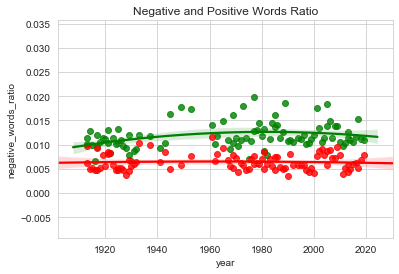

In [20]:
sentiment_q=sns.regplot(x=df_year['year'],y=df_year['positive_words_ratio'], order=2, color='green').set_title('Positive words')
sentiment_q=sns.regplot(x=df_year['year'],y=df_year['negative_words_ratio'], order=2, color='red').set_title('Negative and Positive Words Ratio')
plt.ylabel=("")
ax[0].set_ylabel(' ')

# Plotting words 

KeyError: 'moon_count'

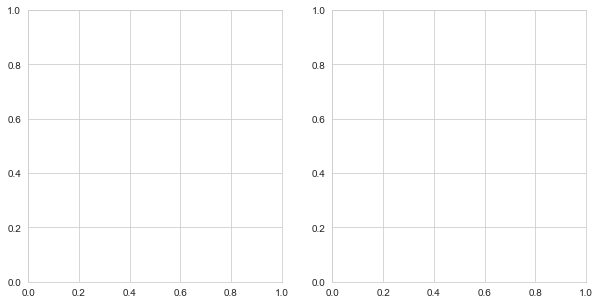

In [21]:

fig, axes =plt.subplots(1,2, figsize=(10,5))

#sns.regplot(x=iris['sepal_length'],y=iris['petal_length'], order=2, ax=axes[0]).set_title('Iris')
sns.regplot(x=df_sotu['year'],y=df_sotu['moon_count'], order=1, ax=axes[0], color='red').set_title('Positive words')
sns.regplot(x=df_sotu['year'],y=df_sotu['china_count'], order=1, ax=axes[0], color='blue').set_title('Negative words')

plt.tight_layout()
axes[1].set_ylim([0,1])
fig.savefig('plotE.png')

# WordCloud

In [27]:
!pip install wordcloud

In [29]:
import numpy as np
import pandas as pd
import os
from os import path
from PIL import Image
from collections import Counter
import nltk
import string
from scipy import misc
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
example = str(df_year_rep['some_words'])

wordcloud = WordCloud(max_words=100).generate(example)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

KeyError: 'some_words'

In [ ]:
example = str(df_year_demo['some_words'])

wordcloud = WordCloud(max_words=100).generate(example)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()